##Investing in Stocks



In this project, we are investigating the investment strategies for stocks and cryptocurrencies based on Modern Portfolio Theory (MPT). 
Our goal is to allocate the money into stocks to maximize the expected return while accounting the risk tolerance, which is measured by volatility.


## Import Libs

In this block we import the libraries

In [ ]:
# import modules
import pandas as pd
import numpy as np
from pylab import * 
import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("bonmin") or os.path.isfile("bonmin")):
    if "google.colab" in sys.modules:
        !wget -N -q "https://ampl.com/dl/open/bonmin/bonmin-linux64.zip"
        !unzip -o -q bonmin-linux64
        # !apt-get install -y -qq mindtpy
    else:
        try:
            !conda install -c conda-forge ipopt
        except:
            pass

assert(shutil.which("bonmin") or os.path.isfile("bonmin"))

# This is how you should setup the SolverFactory command to use Bonmin
# SolverFactory('bonmin', executable='/content/bonmin')

from pyomo.environ import *


     |████████████████████████████████| 9.6 MB 3.9 MB/s 
     |████████████████████████████████| 49 kB 1.2 MB/s 


In [ ]:
# some useful modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# some stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

     |████████████████████████████████| 81 kB 3.6 MB/s 
     |████████████████████████████████| 83 kB 1.3 MB/s 
     |████████████████████████████████| 127 kB 41.6 MB/s 
     |████████████████████████████████| 112 kB 47.9 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=c6f6edf234444332b2ec6da3581a65010b2f1e5e8088a28479b122d3eb3a0c69
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=a18a266197756df799bcf221a1ac33fa49a528df703b21ef96561590a35135bd
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=4178b43f0488c6d657de35fc8932e1b85d69a396069e6b9b50137507410c43de
  Stored in directory: /root/.cache/pip/wheels/73/ad/a4/0dff4a6ef231fc0dfa12ffbac2a36ce

## Data Preparation

 Extract Stock Market Data

We have pulled out 8 stocks and Cryptocurrencies data from https://finance.yahoo.com/ as below.

'ZNGA' - Zynga 

'UBER' - Uber Technologies, Inc.

'SBUX' - Starbucks Corporation

'BCS' - Barclays PLC

'XMR-USD' - Monero USD

'NEO-USD' - Neo USD

'DOGE-USD' - Dogecoin USD

'LTC-USD' - Litecoin USD

In [ ]:
# Creating a list of tickers that we want to scrap

tickers_list = ['ZNGA','UBER','SBUX','BCS','XMR-USD','NEO-USD','DOGE-USD','LTC-USD']

# fetching daily data for the above tickers from Jan 2016 to December 2020

daily_prices = {ticker : si.get_data(ticker,start_date = '01/01/2016',end_date = '12/31/2020',interval='1d') for ticker in tickers_list}

In [ ]:
# Displaying the stock records
daily_prices

{'BCS':              open   high    low  close   adjclose   volume ticker
 2016-01-04  12.63  12.86  12.58  12.85  10.687020  4131500    BCS
 2016-01-05  12.79  12.84  12.64  12.77  10.620486  2040100    BCS
 2016-01-06  12.39  12.50  12.36  12.42  10.329400  3033400    BCS
 2016-01-07  12.05  12.18  11.92  11.93   9.921880  4050100    BCS
 2016-01-08  12.02  12.05  11.66  11.68   9.713961  3254700    BCS
 ...           ...    ...    ...    ...        ...      ...    ...
 2020-12-23   7.98   8.23   7.97   8.20   7.883547  7377100    BCS
 2020-12-24   8.36   8.39   8.09   8.11   7.797020  3646500    BCS
 2020-12-28   8.20   8.25   8.16   8.17   7.854705  2337900    BCS
 2020-12-29   8.11   8.13   8.01   8.04   7.729722  4010600    BCS
 2020-12-30   8.10   8.14   8.02   8.03   7.720108  2652700    BCS
 
 [1258 rows x 7 columns],
 'DOGE-USD':                 open      high       low     close  adjclose     volume  \
 2017-11-09  0.001207  0.001415  0.001181  0.001415  0.001415    6259550 

In [ ]:
# creating a dataframe with just the adjclose (price at the close of each day) column of each ticker
prep_data = pd.DataFrame(daily_prices['ZNGA']['adjclose']).rename(columns = {"adjclose":"ZNGA"})

# combine all the tickers (all the rest of the samples)
for i in tickers_list[1:]:
  prep_data[i] = pd.DataFrame(daily_prices[i]['adjclose'])

prep_data # checking the dataframe

,ZNGA,UBER,SBUX,BCS,XMR-USD,NEO-USD,DOGE-USD,LTC-USD
2016-01-04,2.58,NaN,51.846081,10.687020,NaN,NaN,NaN,3.495390
2016-01-05,2.56,NaN,52.193150,10.620486,NaN,NaN,NaN,3.469670
2016-01-06,2.57,NaN,51.730404,10.329400,NaN,NaN,NaN,3.453560
2016-01-07,2.48,NaN,50.448917,9.921880,NaN,NaN,NaN,3.604140
2016-01-08,2.41,NaN,50.395527,9.713961,NaN,NaN,NaN,3.568880
...,...,...,...,...,...,...,...,...
2020-12-23,9.93,53.709999,99.893814,7.883547,150.897614,13.459212,0.003768,101.817062
2020-12-24,9.91,52.880001,99.844887,7.797020,156.756287,15.265430,0.004570,111.565399
2020-12-28,9.73,51.970001,102.125435,7.854705,166.487076,15.606667,0.004592,130.050339
2020-12-29,9.61,52.270000,103.388039,7.729722,161.393219,15.048743,0.004486,129.040802


## Data Clean up

Removing missing/ NAN values and creating dataframe with % change in stocks values.

In [ ]:
prep_data.isna().sum() # checking for missing values in the dataframe

ZNGA          0
UBER        843
SBUX          0
BCS           0
XMR-USD     468
NEO-USD     468
DOGE-USD    468
LTC-USD       0
dtype: int64

There are missing values for the cryptocurrency records. Hence we proceed to remove the missing values

In [ ]:
prep_data.dropna(axis=0, inplace=True)  # removing the missing value rows
prep_data

,ZNGA,UBER,SBUX,BCS,XMR-USD,NEO-USD,DOGE-USD,LTC-USD
2019-05-10,5.94,41.570000,74.547890,7.510468,68.072891,8.769207,0.002522,77.166649
2019-05-13,5.88,37.099998,72.893814,7.238349,79.157272,9.815132,0.002756,88.058235
2019-05-14,6.01,39.959999,73.255051,7.356267,83.074654,11.032737,0.003068,91.620407
2019-05-15,6.19,41.290001,73.920494,7.401620,94.083717,12.800788,0.003308,101.744568
2019-05-16,6.23,43.000000,75.004204,7.437902,87.010948,11.995152,0.003168,95.585587
...,...,...,...,...,...,...,...,...
2020-12-23,9.93,53.709999,99.893814,7.883547,150.897614,13.459212,0.003768,101.817062
2020-12-24,9.91,52.880001,99.844887,7.797020,156.756287,15.265430,0.004570,111.565399
2020-12-28,9.73,51.970001,102.125435,7.854705,166.487076,15.606667,0.004592,130.050339
2020-12-29,9.61,52.270000,103.388039,7.729722,161.393219,15.048743,0.004486,129.040802


In [ ]:
prep_data.isna().sum() # checking for missing values in the dataframe

ZNGA        0
UBER        0
SBUX        0
BCS         0
XMR-USD     0
NEO-USD     0
DOGE-USD    0
LTC-USD     0
dtype: int64

In [ ]:
# creating a new data frame with percentage change in the price each day instead of the price itself
df_return_data = pd.DataFrame()
for i in tickers_list:
  df_return_data[i] = prep_data[i].pct_change() # get % change

df_return_data

,ZNGA,UBER,SBUX,BCS,XMR-USD,NEO-USD,DOGE-USD,LTC-USD
2019-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-13,-0.010101,-0.107529,-0.022188,-0.036232,0.162831,0.119272,0.092783,0.141144
2019-05-14,0.022109,0.077089,0.004956,0.016291,0.049489,0.124054,0.113208,0.040452
2019-05-15,0.029950,0.033283,0.009084,0.006165,0.132520,0.160255,0.078227,0.110501
2019-05-16,0.006462,0.041414,0.014660,0.004902,-0.075175,-0.062936,-0.042322,-0.060534
...,...,...,...,...,...,...,...,...
2020-12-23,-0.006006,-0.001302,-0.003418,0.060802,-0.033780,-0.186038,-0.164153,-0.104357
2020-12-24,-0.002014,-0.015453,-0.000490,-0.010976,0.038825,0.134199,0.212845,0.095744
2020-12-28,-0.018164,-0.017209,0.022841,0.007398,0.062076,0.022354,0.004814,0.165687
2020-12-29,-0.012333,0.005773,0.012363,-0.015912,-0.030596,-0.035749,-0.023084,-0.007763


In [ ]:
df_return_data.isna().sum() # checking for missing values

ZNGA        1
UBER        1
SBUX        1
BCS         1
XMR-USD     1
NEO-USD     1
DOGE-USD    1
LTC-USD     1
dtype: int64

In [ ]:
# drop the na records
df_return_data.dropna(inplace=True)

df_return_data

,ZNGA,UBER,SBUX,BCS,XMR-USD,NEO-USD,DOGE-USD,LTC-USD
2019-05-13,-0.010101,-0.107529,-0.022188,-0.036232,0.162831,0.119272,0.092783,0.141144
2019-05-14,0.022109,0.077089,0.004956,0.016291,0.049489,0.124054,0.113208,0.040452
2019-05-15,0.029950,0.033283,0.009084,0.006165,0.132520,0.160255,0.078227,0.110501
2019-05-16,0.006462,0.041414,0.014660,0.004902,-0.075175,-0.062936,-0.042322,-0.060534
2019-05-17,-0.006421,-0.025349,0.000127,-0.021951,-0.057488,-0.065575,-0.065025,-0.068947
...,...,...,...,...,...,...,...,...
2020-12-23,-0.006006,-0.001302,-0.003418,0.060802,-0.033780,-0.186038,-0.164153,-0.104357
2020-12-24,-0.002014,-0.015453,-0.000490,-0.010976,0.038825,0.134199,0.212845,0.095744
2020-12-28,-0.018164,-0.017209,0.022841,0.007398,0.062076,0.022354,0.004814,0.165687
2020-12-29,-0.012333,0.005773,0.012363,-0.015912,-0.030596,-0.035749,-0.023084,-0.007763


Now we have a dataset with every day percentage chagne in price for 4 stocks and 4 crypto currencies.

In [ ]:
# calculating the mean and standard deviation of each ticker
ss=["mean","std"]
df_return_data.agg(ss)

,ZNGA,UBER,SBUX,BCS,XMR-USD,NEO-USD,DOGE-USD,LTC-USD
mean,0.001473,0.001406,0.001082,0.000649,0.003538,0.003345,0.002883,0.002992
std,0.023863,0.041021,0.023831,0.034086,0.053254,0.064400,0.054737,0.058532


It is ideal to choose the stock with higher average return (mean), at the same time, it is also important to look for a low standard deviation.



# Visualize the data

Below are the visualization trend of each selected stocks/cryptos.

As we can see from the visualizations of each stock, the highly volatile stock is NEO-USD and then next one is LT-USD. The least volatile being ZNGA and SBUX. Most stocks appear to have hit low values during April 2020 - May 2020. 

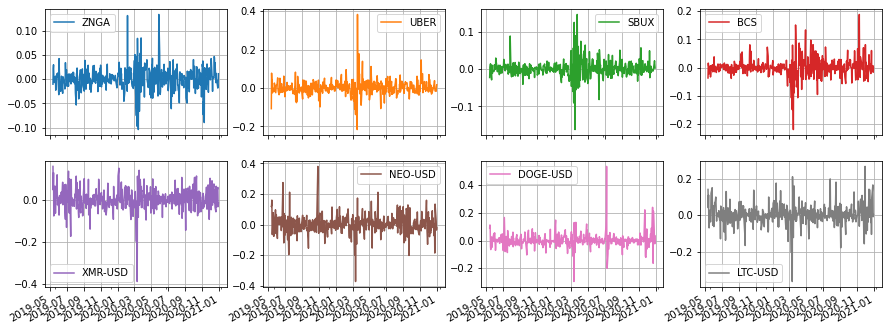

In [ ]:
# plotting the visualization graphs for each stock
df_return_data.plot(subplots=True,
        grid=True, # grid
        layout=(5,4), # layout
         figsize=(15,15)) # fig size
plt.show() # showing the plot

#Nonlinear Optimization: Portfolio Allocation

The performance of individual stocks can be measured in two ways: return and risk. 

Return is the percentage growth in the value of the stock.

Risk is the variability associated with the returns on the stock.

We create portfolio allocation based on the stocks we have selected with goal to maximize the mean return and to minimize the risk.

In [ ]:
# import required modules
import matplotlib.pyplot as plt
from pylab import *

In [ ]:
# install pyomo
!pip install -q pyomo
from pyomo.environ import *

try:
    import google.colab
    try:
        from pyomo.environ import *
    except:
        !pip install -q pyomo
    if not 'ipopt_executable' in vars():
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
        ipopt_executable = '/content/ipopt' # THIS IS NEW! We are using the IPOPT Solver.
except:
    pass

In [ ]:
# Dataframe with the portfolio information is used and present index is deleted and replaced with numeric index
df_return_data.reset_index(drop=True, inplace=True)
df_return_data

,ZNGA,UBER,SBUX,BCS,XMR-USD,NEO-USD,DOGE-USD,LTC-USD
0,-0.010101,-0.107529,-0.022188,-0.036232,0.162831,0.119272,0.092783,0.141144
1,0.022109,0.077089,0.004956,0.016291,0.049489,0.124054,0.113208,0.040452
2,0.029950,0.033283,0.009084,0.006165,0.132520,0.160255,0.078227,0.110501
3,0.006462,0.041414,0.014660,0.004902,-0.075175,-0.062936,-0.042322,-0.060534
4,-0.006421,-0.025349,0.000127,-0.021951,-0.057488,-0.065575,-0.065025,-0.068947
...,...,...,...,...,...,...,...,...
409,-0.006006,-0.001302,-0.003418,0.060802,-0.033780,-0.186038,-0.164153,-0.104357
410,-0.002014,-0.015453,-0.000490,-0.010976,0.038825,0.134199,0.212845,0.095744
411,-0.018164,-0.017209,0.022841,0.007398,0.062076,0.022354,0.004814,0.165687
412,-0.012333,0.005773,0.012363,-0.015912,-0.030596,-0.035749,-0.023084,-0.007763


In [ ]:
# Creating a column in a dataframe and calculating the mean of the return
Avg_Return = pd.DataFrame(np.mean(df_return_data) ,columns=["Avg_Return"])
print(Avg_Return)
# Creating a clumn in a dataframe and calculating the standard average of the return
Std_Dev_Return = pd.DataFrame(np.std(df_return_data) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return)

          Avg_Return
ZNGA        0.001473
UBER        0.001406
SBUX        0.001082
BCS         0.000649
XMR-USD     0.003538
NEO-USD     0.003345
DOGE-USD    0.002883
LTC-USD     0.002992
          Std_Dev_Return
ZNGA            0.023834
UBER            0.040971
SBUX            0.023802
BCS             0.034045
XMR-USD         0.053190
NEO-USD         0.064322
DOGE-USD        0.054671
LTC-USD         0.058461


##Covariance and Modern Portfolio Theory

In order to decide which stocks to include, we can use Covariance and Modern Portfolio is used to reduce the overall risk to the portfolio

Covariance is related to correlation but does not imply that they are same thing.

Covariance in this case is a numeric representation of how stocks vary together. 

Correlation is covariance divided by standard devation.

In [ ]:
# From the dataframe we got for the portfolio were are creating a covariance matrix
Covariance_matrix = df_return_data.cov()
Covariance_matrix

,ZNGA,UBER,SBUX,BCS,XMR-USD,NEO-USD,DOGE-USD,LTC-USD
ZNGA,0.000569,0.000232,0.000182,0.000085,0.000191,0.000220,0.000257,0.000249
UBER,0.000232,0.001683,0.000514,0.000603,0.000439,0.000554,0.000491,0.000405
SBUX,0.000182,0.000514,0.000568,0.000484,0.000317,0.000347,0.000226,0.000346
BCS,0.000085,0.000603,0.000484,0.001162,0.000383,0.000456,0.000295,0.000406
XMR-USD,0.000191,0.000439,0.000317,0.000383,0.002836,0.002377,0.001480,0.002328
NEO-USD,0.000220,0.000554,0.000347,0.000456,0.002377,0.004147,0.001884,0.002742
DOGE-USD,0.000257,0.000491,0.000226,0.000295,0.001480,0.001884,0.002996,0.001772
LTC-USD,0.000249,0.000405,0.000346,0.000406,0.002328,0.002742,0.001772,0.003426


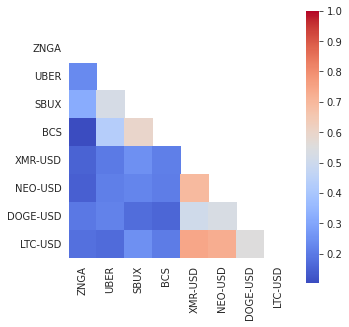

In [ ]:
# From the dataframe we got for the portfolio were are creating a Correlation matrix
Corr_matrix = df_return_data.corr()
Corr_matrix

#From the above correlation matrix we are creating a heat map for analyzing
mask = np.zeros_like(Corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(Corr_matrix, mask=mask, vmax=1, square=True,
                     xticklabels=True, yticklabels=True, cmap='coolwarm')

##Building  the Nonlinear Optimization Model

After creating a ConcreteModel, the decision variables are specified and bounded them (between 0 and 1) so that it doesn't go down the rabbit hole!

In [ ]:
# From the asset dataframe we are creating covariance table
df_return_data_cov = df_return_data.cov()  # get covariance
print('Covariance Matrix:')
print(df_return_data_cov)
print('\n') 

# Creating the mean of each asset so that these are used as objective function COEFFICIENTS
df_return_data_mean = df_return_data.mean()  # get mean
print('Average Return:')
print(df_return_data_mean)

Covariance Matrix:
              ZNGA      UBER      SBUX       BCS   XMR-USD   NEO-USD  \
ZNGA      0.000569  0.000232  0.000182  0.000085  0.000191  0.000220   
UBER      0.000232  0.001683  0.000514  0.000603  0.000439  0.000554   
SBUX      0.000182  0.000514  0.000568  0.000484  0.000317  0.000347   
BCS       0.000085  0.000603  0.000484  0.001162  0.000383  0.000456   
XMR-USD   0.000191  0.000439  0.000317  0.000383  0.002836  0.002377   
NEO-USD   0.000220  0.000554  0.000347  0.000456  0.002377  0.004147   
DOGE-USD  0.000257  0.000491  0.000226  0.000295  0.001480  0.001884   
LTC-USD   0.000249  0.000405  0.000346  0.000406  0.002328  0.002742   

          DOGE-USD   LTC-USD  
ZNGA      0.000257  0.000249  
UBER      0.000491  0.000405  
SBUX      0.000226  0.000346  
BCS       0.000295  0.000406  
XMR-USD   0.001480  0.002328  
NEO-USD   0.001884  0.002742  
DOGE-USD  0.002996  0.001772  
LTC-USD   0.001772  0.003426  


Average Return:
ZNGA        0.001473
UBER        0.

## Declare variables

In [ ]:
#import pyomo concrete model
from pyomo.environ import *

m = ConcreteModel()

# defining variables and each variable in the model is a asset
m.ZNGA = Var(within=NonNegativeReals, bounds=(0,1))
m.UBER = Var(within=NonNegativeReals, bounds=(0,1))
m.SBUX = Var(within=NonNegativeReals, bounds=(0,1))
m.BCS = Var(within=NonNegativeReals, bounds=(0,1))
m.XMR_USD = Var(within=NonNegativeReals, bounds=(0,1))
m.NEO_USD = Var(within=NonNegativeReals, bounds=(0,1))
m.DOGE_USD = Var(within=NonNegativeReals, bounds=(0,1))
m.LTC_USD = Var(within=NonNegativeReals, bounds=(0,1))


## Define Contraints and Objective funtion

We specified the objective function to maximize our returns.

We are specifying the fraction/proportion we are investing in each stock multiplied by its average return. We also specify two constriants. 

1.   The amount we invest in our portfolio needs to sum to '1' or 100% as we must invest all of our money, regardless of how much money we start with.
2.   The returns need to be greater than 0.008 which is the 'return floor'.

In [ ]:
# declaring the objective and setting the values to maximum the returns

m.objective = Objective(expr =               
                        m.ZNGA*df_return_data_mean[0] + 
                        m.UBER*df_return_data_mean[1] + 
                        m.SBUX*df_return_data_mean[2] +
                        m.BCS*df_return_data_mean[3] + 
                        m.XMR_USD*df_return_data_mean[4]+
                        m.NEO_USD*df_return_data_mean[5]+
                        m.DOGE_USD*df_return_data_mean[6]+
                        m.LTC_USD*df_return_data_mean[7],
                        sense=maximize)

# declaring constraints for the function
# 1. Sum of all porportions = 1
m.sum_proportions = Constraint(expr = m.ZNGA + m.UBER + m.SBUX + m.BCS +  m.XMR_USD + m.NEO_USD + m.DOGE_USD + m.LTC_USD == 1)

# 2. Minimum return should be more than 0.008
m.risk_floor = Constraint(expr =  m.ZNGA + m.UBER + m.SBUX + m.BCS +  m.XMR_USD + m.NEO_USD + m.DOGE_USD + m.LTC_USD >= 0.008)

##Risk Ceiling

We start with a risk ceiling of 0.008



In [ ]:
# Calculations table is been created for calculate the risk

# Defining the funtion for calculating the risk for the assets

def calc_risk(m):
  proportions = m.ZNGA, m.UBER, m.SBUX, m.BCS, m.XMR_USD, m.NEO_USD, m.DOGE_USD, m.LTC_USD
 
  tickers = ["ZNGA","UBER","SBUX","BCS","XMR-USD","NEO-USD","DOGE-USD","LTC-USD"]
  risk_exp = 0
  for i in range(len(proportions)):
    for j in range(len(proportions)):
      risk_exp += proportions[i]*df_return_data_cov.at[tickers[i],tickers[j]]*proportions[j]
  return risk_exp

# For computing the risk we are using this variable
expr_risk = calc_risk(m)

# Maximum risk has been defined to be less than 0.008
max_risk = 0.008
# Risk conditions has been given to create a series
risk_limits = np.arange(0.0001, max_risk, 0.00005)
risk_limits.shape

(158,)

## Run the model
Running the model!

In [ ]:
# By creating a dictionary we are updating risk contraint for each limit for parameter analysis
# Here in dictionary we will be using risk as key and value as stock allocation
param_analysis = {} 
#Creating dictionary for returns
# Here in dictionary we will be using risk as key and value as return
returns = {}
for r in risk_limits:
  m.del_component(m.risk_floor)
  m.risk_floor = Constraint(expr = expr_risk <= r)
  # running solver for optimization with ipopt name
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m).write()
  # allocation proportions are been stored in dictionary for each index
  param_analysis[r] = [m.ZNGA(), m.UBER(), m.SBUX(), m.BCS(), m.XMR_USD(), m.NEO_USD(), m.DOGE_USD(), m.LTC_USD()]
  # return are been stored in dictionary for each index
  returns[r] =  m.ZNGA()*df_return_data_mean[0] + m.UBER()*df_return_data_mean[1] + m.SBUX()*df_return_data_mean[2] + m.BCS()*df_return_data_mean[3] + m.XMR_USD()*df_return_data_mean[4] + m.NEO_USD()*df_return_data_mean[5] + m.DOGE_USD()*df_return_data_mean[6] + m.LTC_USD()*df_return_data_mean[7] 

    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 8
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time:

## Run model to remove infeasible solutions

In [ ]:
# updating risk contraint for each limit and then solving the problem
from pyomo.opt import SolverStatus, TerminationCondition

# By creating a dictionary we are updating risk contraint for each limit for parameter analysis

# Here in dictionary we will be using risk as key and value as stock allocation

param_analysis = {}

#Creating dictionary for returns

# Here in dictionary we will be using risk as key and value as return

returns = {}
for r in risk_limits:
  m.del_component(m.risk_floor)
  m.risk_floor = Constraint(expr = expr_risk <= r)
  ## running solver for optimization with ipopt name
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m)
  # Ignoring this run if solution is not feasible
  if result.solver.termination_condition == TerminationCondition.infeasible:
    continue

  result = result.write()
  # allocation proportions are been stored in dictionary for each index
  param_analysis[r] = [m.ZNGA(), m.UBER(), m.SBUX(), m.BCS(), m.XMR_USD(), m.NEO_USD(), m.DOGE_USD(), m.LTC_USD()]
  # return are been stored in dictionary for each index
  returns[r] =  m.ZNGA()*df_return_data_mean[0] + m.UBER()*df_return_data_mean[1] + m.SBUX()*df_return_data_mean[2] + m.BCS()*df_return_data_mean[3] + m.XMR_USD()*df_return_data_mean[4] + m.NEO_USD()*df_return_data_mean[5] + m.DOGE_USD()*df_return_data_mean[6] + m.LTC_USD()*df_return_data_mean[7] 

    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
    model.name="unknown";
      - termination

## Parameter Analysis
We are doing parameter analysis to see what the efficient frontier looks like, and the stock allocation plots.

In [ ]:
param_analysis

{0.00035000000000000005: [0.4771144764283669,
  0.0,
  0.36218119173054486,
  0.10770109911604885,
  0.024107013587125976,
  0.0,
  0.028896242933290673,
  0.0],
 0.0004: [0.49025687243099586,
  0.0013049267599004588,
  0.3174808756259159,
  0.013108809753432527,
  0.12272270843140097,
  7.842401134934592e-06,
  0.05511607448959397,
  1.8901076254939057e-06],
 0.00045000000000000004: [0.49867302096603383,
  0.009314018579619977,
  0.2500054356117007,
  5.776111718724319e-06,
  0.17464927810624198,
  6.873354290140289e-05,
  0.06728128166198573,
  2.4554197977724627e-06],
 0.0005000000000000001: [0.5056643004024399,
  0.014170460103364594,
  0.19017795534778068,
  3.650464622792582e-06,
  0.21328001817389036,
  0.0006039289757990855,
  0.07609692459503337,
  2.7619370690495687e-06],
 0.0005500000000000001: [0.5114660864022796,
  0.018116095653366852,
  0.1409142870394229,
  3.0298332840686794e-06,
  0.24435331302719626,
  0.0020886874418567136,
  0.08305557219660753,
  2.928405985956582

<Figure size 40000x40000 with 0 Axes>

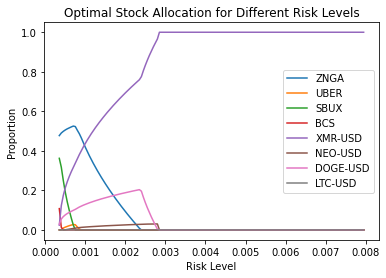

In [ ]:
# Creating dataframe for proportions of the portfolio for each risk limit

param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')

#Giving the tickers as the column names
param_analysis.columns = ['ZNGA', 'UBER', 'SBUX', 'BCS', 'XMR-USD', 'NEO-USD', 'DOGE-USD', 'LTC-USD']
param_analysis
# Specifying the size of the plot
plt.figure(figsize=(50, 50), dpi=800)
# Plotting the graph
param_analysis.plot()
# Giving the title for the plot
plt.title('Optimal Stock Allocation for Different Risk Levels')
# Display the plot

plt.xlabel('Risk Level')
plt.ylabel('Proportion')

plt.show()

We can observe on the lefthand side that there is low risk and high diversity whereas on the on the righthand side there is high risk and low diversity. At each risk level, this is the optimal allocation of stocks.

From the graph we can see that we can have optimal solution at 0.0025 risk and we can extract 4 assets 'ZNGA','NEO-USD','XMR-USD','DOGE-USD'

In [ ]:
# Creating the subsets
# Extracting dictionary keys into list
risk = list(returns.keys())
print(risk)
# Extracting dictionary values into list
reward = list(returns.values()) 
print(reward)

[0.00035000000000000005, 0.0004, 0.00045000000000000004, 0.0005000000000000001, 0.0005500000000000001, 0.0006000000000000002, 0.0006500000000000002, 0.0007000000000000001, 0.0007500000000000001, 0.0008000000000000001, 0.0008500000000000002, 0.0009000000000000002, 0.0009500000000000002, 0.0010000000000000002, 0.0010500000000000002, 0.0011000000000000003, 0.0011500000000000002, 0.0012000000000000003, 0.0012500000000000002, 0.0013000000000000002, 0.0013500000000000003, 0.0014000000000000002, 0.0014500000000000003, 0.0015000000000000002, 0.0015500000000000004, 0.0016000000000000003, 0.0016500000000000004, 0.0017000000000000003, 0.0017500000000000003, 0.0018000000000000004, 0.0018500000000000003, 0.0019000000000000004, 0.0019500000000000003, 0.0020000000000000005, 0.00205, 0.0021000000000000003, 0.00215, 0.0022, 0.0022500000000000003, 0.0023000000000000004, 0.00235, 0.0024000000000000002, 0.0024500000000000004, 0.0025, 0.00255, 0.0026000000000000003, 0.0026500000000000004, 0.0027, 0.0027500

Plot it! The efficient frontier

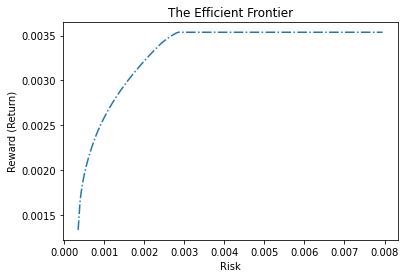

In [ ]:
#showing plots
# Importing pylab
from pylab import *
plot(risk, reward, '-.') # Plotting risk vs reward with indicator
title('The Efficient Frontier') # Giving title for plot
# Labelling the axis
xlabel('Risk')
ylabel('Reward (Return)')
plt.show()

# Monte Carlo Simulation

From our portfolio distribution, we can see that for a risk level close to 0.0025, and our selected 4 stocks have a significant return compared to the rest. Hence we have chose the risk level as 0.0025 and stocks (ZNGA','NEO-USD','XMR-USD','DOGE-USD') that yield a return for the simulation.

In [ ]:
risk_level=0.0025
# we have chosen risk level as 0.0025
selected_stocks = ['ZNGA','NEO-USD','XMR-USD','DOGE-USD'] 
# selecting the stocks for the simualtion
selected_portfolio = df_return_data[selected_stocks] 
# subset the df_return_data dataframe for the chosen stocks.
#show the portfolio
selected_portfolio

,ZNGA,NEO-USD,XMR-USD,DOGE-USD
0,-0.010101,0.119272,0.162831,0.092783
1,0.022109,0.124054,0.049489,0.113208
2,0.029950,0.160255,0.132520,0.078227
3,0.006462,-0.062936,-0.075175,-0.042322
4,-0.006421,-0.065575,-0.057488,-0.065025
...,...,...,...,...
409,-0.006006,-0.186038,-0.033780,-0.164153
410,-0.002014,0.134199,0.038825,0.212845
411,-0.018164,0.022354,0.062076,0.004814
412,-0.012333,-0.035749,-0.030596,-0.023084


In [ ]:
# calculate the portfolio for the selected 4 stocks 
selected_portfolio_cov=selected_portfolio.cov() 
selected_portfolio_cov

,ZNGA,NEO-USD,XMR-USD,DOGE-USD
ZNGA,0.000569,0.000220,0.000191,0.000257
NEO-USD,0.000220,0.004147,0.002377,0.001884
XMR-USD,0.000191,0.002377,0.002836,0.001480
DOGE-USD,0.000257,0.001884,0.001480,0.002996


In [ ]:
# resetting the index to subset by the index column
selected_portfolio=selected_portfolio.reset_index() 
selected_portfolio


,index,ZNGA,NEO-USD,XMR-USD,DOGE-USD
0,0,-0.010101,0.119272,0.162831,0.092783
1,1,0.022109,0.124054,0.049489,0.113208
2,2,0.029950,0.160255,0.132520,0.078227
3,3,0.006462,-0.062936,-0.075175,-0.042322
4,4,-0.006421,-0.065575,-0.057488,-0.065025
...,...,...,...,...,...
409,409,-0.006006,-0.186038,-0.033780,-0.164153
410,410,-0.002014,0.134199,0.038825,0.212845
411,411,-0.018164,0.022354,0.062076,0.004814
412,412,-0.012333,-0.035749,-0.030596,-0.023084


In [ ]:
# rename the column for ease of understanding
selected_portfolio.rename({'index':'Date'},axis=1, inplace=True) 

In [ ]:
# check the portfolio dataframe
selected_portfolio


,Date,ZNGA,NEO-USD,XMR-USD,DOGE-USD
0,0,-0.010101,0.119272,0.162831,0.092783
1,1,0.022109,0.124054,0.049489,0.113208
2,2,0.029950,0.160255,0.132520,0.078227
3,3,0.006462,-0.062936,-0.075175,-0.042322
4,4,-0.006421,-0.065575,-0.057488,-0.065025
...,...,...,...,...,...
409,409,-0.006006,-0.186038,-0.033780,-0.164153
410,410,-0.002014,0.134199,0.038825,0.212845
411,411,-0.018164,0.022354,0.062076,0.004814
412,412,-0.012333,-0.035749,-0.030596,-0.023084


In [ ]:
# restting the index of the portfolio allocation in order to filter by risk level
portfolio_allocation=param_analysis.reset_index() 
portfolio_allocation


,index,ZNGA,UBER,SBUX,BCS,XMR-USD,NEO-USD,DOGE-USD,LTC-USD
0,0.00035,0.477114,0.000000,0.362181,1.077011e-01,0.024107,0.000000,0.028896,0.000000
1,0.00040,0.490257,0.001305,0.317481,1.310881e-02,0.122723,0.000008,0.055116,0.000002
2,0.00045,0.498673,0.009314,0.250005,5.776112e-06,0.174649,0.000069,0.067281,0.000002
3,0.00050,0.505664,0.014170,0.190178,3.650465e-06,0.213280,0.000604,0.076097,0.000003
4,0.00055,0.511466,0.018116,0.140914,3.029833e-06,0.244353,0.002089,0.083056,0.000003
...,...,...,...,...,...,...,...,...,...
148,0.00775,0.000001,0.000001,0.000001,8.924188e-07,0.999967,0.000019,0.000005,0.000005
149,0.00780,0.000001,0.000001,0.000001,8.925289e-07,0.999967,0.000019,0.000005,0.000005
150,0.00785,0.000001,0.000001,0.000001,8.926285e-07,0.999967,0.000018,0.000005,0.000005
151,0.00790,0.000001,0.000001,0.000001,8.927188e-07,0.999967,0.000018,0.000005,0.000005


In [ ]:
# rename the column as Risk Level
portfolio_allocation.rename({'index':'Risk Level'},axis=1,inplace=True) 
portfolio_allocation


,Risk Level,ZNGA,UBER,SBUX,BCS,XMR-USD,NEO-USD,DOGE-USD,LTC-USD
0,0.00035,0.477114,0.000000,0.362181,1.077011e-01,0.024107,0.000000,0.028896,0.000000
1,0.00040,0.490257,0.001305,0.317481,1.310881e-02,0.122723,0.000008,0.055116,0.000002
2,0.00045,0.498673,0.009314,0.250005,5.776112e-06,0.174649,0.000069,0.067281,0.000002
3,0.00050,0.505664,0.014170,0.190178,3.650465e-06,0.213280,0.000604,0.076097,0.000003
4,0.00055,0.511466,0.018116,0.140914,3.029833e-06,0.244353,0.002089,0.083056,0.000003
...,...,...,...,...,...,...,...,...,...
148,0.00775,0.000001,0.000001,0.000001,8.924188e-07,0.999967,0.000019,0.000005,0.000005
149,0.00780,0.000001,0.000001,0.000001,8.925289e-07,0.999967,0.000019,0.000005,0.000005
150,0.00785,0.000001,0.000001,0.000001,8.926285e-07,0.999967,0.000018,0.000005,0.000005
151,0.00790,0.000001,0.000001,0.000001,8.927188e-07,0.999967,0.000018,0.000005,0.000005


In [ ]:
# subsetting the portfolio allocation for a certain risk level
selected_port_allocation=portfolio_allocation[portfolio_allocation['Risk Level']==risk_level] 
# subsetting the portfolio allocation for the selected stocks 
selected_port_allocation=selected_port_allocation[selected_stocks] 

# dropping the index column
selected_port_allocation.reset_index(drop=True,inplace=True) #Dropping index
# printing the allocation for the a selected risk level and chosen stocks
print(selected_port_allocation) 

       ZNGA  NEO-USD   XMR-USD  DOGE-USD
0  0.000008  0.02922  0.833627  0.137126


In [ ]:
# sorting the stocks allocation portfolio wit stock wise individual variables
stock1=selected_port_allocation.iloc[0,0] 
stock2=selected_port_allocation.iloc[0,1]
stock3=selected_port_allocation.iloc[0,2]
stock4=selected_port_allocation.iloc[0,3]

## Multivariate simulation

In [ ]:
# Initializing the number of iterations
n_iterations=1000 
#Initializing an empty list to store the returns from the simulation
sim_return_sum=[] 
#Initializing portfolio_sum_return variable to calculate the sum of return from all stocks
portfolio_sum_return=0 
#Initializing loss_count variable to store the loss count
loss_count=0
#Running the simulation 1000 times
for i in range(n_iterations): 
  simulation=np.random.multivariate_normal(mean(selected_portfolio),selected_portfolio.cov()) #Simulating the stock trading value based  on gaussian multivariate normal method.
  portfolio_sum_return=simulation[0]*stock1+simulation[1]*stock2+simulation[2]*stock3+simulation[3]*stock4 #Calculating the sum of return for all combined stocks 
  sim_return_sum.append(portfolio_sum_return) 
  if portfolio_sum_return<0: #Calculating loss or profit
    loss_count+=1 #Counter to calculate the losses count
#Printing the total number of losses in the simulation
print('Loss Count', loss_count)
#Calculating the probabitliy of the loss with the portfolio allocation
loss_probability=(loss_count/n_iterations)*100 
#Priting the loss probability
print('Loss Pprobability',loss_probability) 
 

Loss Count 454
Loss Pprobability 45.4


## Density Plot Analysis

Importing seaborn library for density plot. Plotting the density plot for the returned sum.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


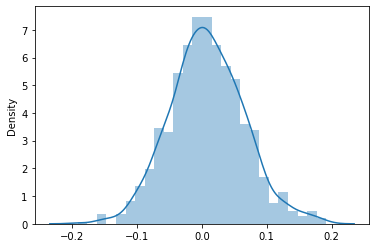

In [ ]:
#Importing seaborn library for density plot
import seaborn as sns 
#Plotting the density plot for the returned sum.
sns.distplot(sim_return_sum)  

We can notice that sum of return for all combined stocks is normally distributed. 

Between 0.1 standard deviation, the density is very high, which shows that the retuns are very high and almost tending towards the profitability.

# Analysis

Let’s see how we would have done in 2021 if we had used our portfolio.

## Selected portofolio stocks Comparision with S&P 500 and Dow Jones Index

The portfolio allocation we choose is 'ZNGA','NEO-USD','XMR-USD','DOGE-USD'

In [ ]:
# Creating a list of tickers that we want to scrap

tickers_list = ['ZNGA','XMR-USD','NEO-USD','DOGE-USD','DJI','SNP']

# fetching monthly data for the above tickers from Jan 2021 to December 2021

monthly_prices = {ticker : si.get_data(ticker,start_date = '01/01/2021',end_date = '12/31/2021',interval='1mo') for ticker in tickers_list}

In [ ]:
# Displaying the stock records
monthly_prices

{'DJI':                     open          high           low         close  \
 2021-01-01  30223.900391  31188.400391  29982.599609  29982.599609   
 2021-02-01  30211.900391  31961.900391  30211.900391  30932.400391   
 2021-03-01  31535.500000  33171.398438  30924.099609  32981.601562   
 2021-04-01  33527.199219  34200.699219  33430.199219  33874.898438   
 2021-05-01  34113.199219  34777.800781  33587.699219  34529.398438   
 2021-06-01  34575.300781  34756.398438  33290.101562  34502.500000   
 2021-07-01  34633.500000  35144.300781  33962.000000  34935.500000   
 2021-08-01  34838.199219  35625.398438  34792.699219  35064.300781   
 2021-09-01  35312.500000  35443.800781  33843.898438  33843.898438   
 2021-10-01  34326.500000  35819.601562  34002.898438  35819.601562   
 2021-11-01  36052.601562  36432.199219  34483.699219  34483.699219   
 2021-12-01  34022.000000  36488.601562  34022.000000  36338.300781   
 
                 adjclose  volume ticker  
 2021-01-01  29982.599609

In [ ]:
# creating a dataframe with just the adjclose (price at the close of 1st of each month) column of each ticker
analysis_data = pd.DataFrame(monthly_prices['ZNGA']['adjclose']).rename(columns = {"adjclose":"ZNGA"})

# combine all the tickers (all the rest of the samples)
for i in tickers_list[1:]:
  analysis_data[i] = pd.DataFrame(monthly_prices[i]['adjclose'])

analysis_data # checking the dataframe

,ZNGA,XMR-USD,NEO-USD,DOGE-USD,DJI,SNP
2021-01-01,9.91,138.060699,22.316113,0.037196,29982.599609,43.466259
2021-02-01,11.15,217.989517,35.091141,0.048052,30932.400391,50.432594
2021-03-01,10.21,246.150543,50.813656,0.053657,32981.601562,48.333527
2021-04-01,10.82,421.890839,97.058350,0.337561,33874.898438,45.088684
2021-05-01,10.84,272.919495,55.981438,0.325810,34529.398438,49.497639
2021-06-01,10.63,222.269440,36.580429,0.254215,34502.500000,46.756935
2021-07-01,10.10,240.170288,45.815498,0.208314,34935.500000,43.473949
2021-08-01,8.85,286.188629,52.178726,0.278453,35064.300781,45.632431
2021-09-01,7.53,250.824753,39.207127,0.204244,33843.898438,46.754459
2021-10-01,7.38,273.707031,44.650494,0.280244,35819.601562,48.680000


In [ ]:
analysis_data['Portfolio_Aggregate']=analysis_data['ZNGA']+analysis_data['XMR-USD']+analysis_data['NEO-USD']+analysis_data['DOGE-USD']
#analysis_data.reset_index(inplace=True)
analysis_data

,ZNGA,XMR-USD,NEO-USD,DOGE-USD,DJI,SNP,Portfolio_Aggregate
2021-01-01,9.91,138.060699,22.316113,0.037196,29982.599609,43.466259,170.324008
2021-02-01,11.15,217.989517,35.091141,0.048052,30932.400391,50.432594,264.278710
2021-03-01,10.21,246.150543,50.813656,0.053657,32981.601562,48.333527,307.227856
2021-04-01,10.82,421.890839,97.058350,0.337561,33874.898438,45.088684,530.106749
2021-05-01,10.84,272.919495,55.981438,0.325810,34529.398438,49.497639,340.066742
2021-06-01,10.63,222.269440,36.580429,0.254215,34502.500000,46.756935,269.734084
2021-07-01,10.10,240.170288,45.815498,0.208314,34935.500000,43.473949,296.294101
2021-08-01,8.85,286.188629,52.178726,0.278453,35064.300781,45.632431,347.495809
2021-09-01,7.53,250.824753,39.207127,0.204244,33843.898438,46.754459,297.766124
2021-10-01,7.38,273.707031,44.650494,0.280244,35819.601562,48.680000,326.017769


The prices of Portfolio_Aggregate, DJI and SNP all fluctuates frequently in the 12 months but the overall trend for all 3 seems to be upward.

In [ ]:
# creating a new data frame with percentage change in the price each day instead of the price itself
df_compare = pd.DataFrame()
for i in tickers_list: # for looping
  df_compare[i] = analysis_data[i].pct_change() # taking % change

df_compare

,ZNGA,XMR-USD,NEO-USD,DOGE-USD,DJI,SNP
2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-01,0.125126,0.578940,0.572458,0.291859,0.031678,0.160270
2021-03-01,-0.084305,0.129185,0.448048,0.116644,0.066248,-0.041621
2021-04-01,0.059745,0.713955,0.910084,5.291090,0.027085,-0.067134
2021-05-01,0.001848,-0.353104,-0.423219,-0.034812,0.019321,0.097784
2021-06-01,-0.019373,-0.185586,-0.346561,-0.219745,-0.000779,-0.055370
2021-07-01,-0.049859,0.080537,0.252459,-0.180560,0.012550,-0.070214
2021-08-01,-0.123762,0.191607,0.138888,0.336698,0.003687,0.049650
2021-09-01,-0.149153,-0.123568,-0.248599,-0.266505,-0.034805,0.024588
2021-10-01,-0.019920,0.091228,0.138836,0.372104,0.058377,0.041184


Since we assume we buy the stocks at Jan 1 and sell them at Dec 1 2021, let us calculate and compare the overall percentage of profit for each stocks and the portfolio aggregate.

In [ ]:
# to find the exact percentage of profit made
analysis_data.reset_index(inplace=True)
analysis_data=analysis_data.drop('index',axis=1)
df_profit=((analysis_data.iloc[-1,:] - analysis_data.iloc[0,:])/analysis_data.iloc[0,:])*100  # calculate the profit/loss %
df_profit


ZNGA                   -35.418767
XMR-USD                 65.742280
NEO-USD                 15.325686
DOGE-USD               358.371883
DJI                     21.197966
SNP                      7.002533
Portfolio_Aggregate     53.314650
dtype: float64

The portfolio aggregate made 53 % profit compared to DJI and SNP which made 21 % and 7 % only. Therefore the portfolio we chose is much better and profitable than DJI and SNP.

##Integer Programming



### Declare variables

In [ ]:
#import pyomo concrete model
from pyomo.environ import *

n = ConcreteModel() # create new model for modified run

# defining variables and each variable in the model is a asset
n.ZNGA = Var(within=NonNegativeReals, bounds=(0,1))
n.UBER = Var(within=NonNegativeReals, bounds=(0,1))
n.SBUX = Var(within=NonNegativeReals, bounds=(0,1))
n.BCS = Var(within=NonNegativeReals, bounds=(0,1))
n.XMR_USD = Var(within=NonNegativeReals, bounds=(0,1))
n.NEO_USD = Var(within=NonNegativeReals, bounds=(0,1))
n.DOGE_USD = Var(within=NonNegativeReals, bounds=(0,1))
n.LTC_USD = Var(within=NonNegativeReals, bounds=(0,1))


In [ ]:
# Define Binary variables

n.bZNGA = Var(domain= Binary)
n.bUBER = Var(domain= Binary)
n.bSBUX = Var(domain= Binary)
n.bBCS = Var(domain= Binary)
n.bXMR_USD = Var(domain= Binary)
n.bNEO_USD = Var(domain= Binary)
n.bDOGE_USD = Var(domain= Binary)
n.bLTC_USD = Var(domain= Binary)

### Define Contraints and Objective funtion

In [ ]:
# declaring the objective and setting the values to maximum the returns

n.objective = Objective(expr =               
                        n.ZNGA*df_return_data_mean[0] + 
                        n.UBER*df_return_data_mean[1] + 
                        n.SBUX*df_return_data_mean[2] +
                        n.BCS*df_return_data_mean[3] + 
                        n.XMR_USD*df_return_data_mean[4]+
                        n.NEO_USD*df_return_data_mean[5]+
                        n.DOGE_USD*df_return_data_mean[6]+
                        n.LTC_USD*df_return_data_mean[7],
                        sense=maximize)

# declaring constraints for the function
# 1. Sum of all porportions = 1
n.sum_proportions = Constraint(expr = n.ZNGA + n.UBER + n.SBUX + n.BCS +  n.XMR_USD + n.NEO_USD + n.DOGE_USD + n.LTC_USD == 1)

# 2. Minimum return should be more than zero
n.risk_floor = Constraint(expr =  n.ZNGA + n.UBER + n.SBUX + n.BCS +  n.XMR_USD + n.NEO_USD + n.DOGE_USD + n.LTC_USD >= 0.008)

# Setting the constraint for picking atleast two stock for 10 % budget allocation
n.selection= Constraint(expr= n.bZNGA +n.bUBER +n.bSBUX +n.bBCS +n.bXMR_USD +n.bNEO_USD +n.bDOGE_USD +n.bLTC_USD >=2 )

# Minimum 10 % constraint
# based on the binary variable output, combination of stocks will be picked
n.floor_ZNGA= Constraint(expr= n.ZNGA >=0.10*n.bZNGA)
n.floor_UBER= Constraint(expr= n.UBER >=0.10*n.bUBER)
n.floor_SBUX= Constraint(expr= n.SBUX >=0.10*n.bSBUX)
n.floor_BCS= Constraint(expr= n.BCS >=0.10*n.bBCS)
n.floor_XMR_USD= Constraint(expr= n.XMR_USD >=0.10*n.bXMR_USD)
n.floor_NEO_USD= Constraint(expr= n.NEO_USD >=0.10*n.bNEO_USD)
n.floor_DOGE_USD= Constraint(expr= n.DOGE_USD >=0.10*n.bDOGE_USD)
n.floor_LTC_USD= Constraint(expr= n.LTC_USD >=0.10*n.bLTC_USD)

###Risk Ceiling



In [ ]:
# Calculations table is been created for calculate the risk

# Defining the funtion for calculating the risk for the assets

def calc_risk(n):
  proportions = n.ZNGA, n.UBER, n.SBUX, n.BCS, n.XMR_USD, n.NEO_USD, n.DOGE_USD, n.LTC_USD
 
  tickers = ["ZNGA","UBER","SBUX","BCS","XMR-USD","NEO-USD","DOGE-USD","LTC-USD"]
  risk_exp = 0
  for i in range(len(proportions)):
    for j in range(len(proportions)):
      risk_exp += proportions[i]*df_return_data_cov.at[tickers[i],tickers[j]]*proportions[j]
  return risk_exp

# For computing the risk we are using this variable
expr_risk = calc_risk(n)

# Maximum risk has been defined to be less than 0.008
max_risk = 0.008
# Risk conditions has been given to create a series
risk_limits = np.arange(0.0001, max_risk, 0.00005)
risk_limits.shape

(158,)

### Run model to remove infeasible solutions

In [ ]:
# updating risk contraint for each limit and then solving the problem
from pyomo.opt import SolverStatus, TerminationCondition

# By creating a dictionary we are updating risk contraint for each limit for parameter analysis

# Here in dictionary we will be using risk as key and value as stock allocation

param_analysis = {}

#Creating dictionary for returns

# Here in dictionary we will be using risk as key and value as return

returns = {}
for r in risk_limits:
  n.del_component(n.risk_floor)
  n.risk_floor = Constraint(expr = expr_risk <= r)
  ## running solver for optimization with ipopt name
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(n)
  # Ignoring this run if solution is not feasible
  if result.solver.termination_condition == TerminationCondition.infeasible:
    continue

  result = result.write()
  # allocation proportions are been stored in dictionary for each index
  param_analysis[r] = [n.ZNGA(), n.UBER(), n.SBUX(), n.BCS(), n.XMR_USD(), n.NEO_USD(), n.DOGE_USD(), n.LTC_USD()]
  # return are been stored in dictionary for each index
  returns[r] =  n.ZNGA()*df_return_data_mean[0] + n.UBER()*df_return_data_mean[1] + n.SBUX()*df_return_data_mean[2] +  n.BCS()*df_return_data_mean[3] + n.XMR_USD()*df_return_data_mean[4] + n.NEO_USD()*df_return_data_mean[5] +   n.DOGE_USD()*df_return_data_mean[6] + n.LTC_USD()*df_return_data_mean[7] 

    model.name="unknown";
      - termination condition: maxIterations
      - message from solver: Ipopt 3.12.13\x3a Maximum Number of Iterations
        Exceeded.
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 11
  Number of variables: 16
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Maximum Number of Iterations Exceeded.
  Termination condition: maxIterations
  Id: 400
  Error rc: 0
  Time: 3.1384758949279785
# ----------------------------

### Parameter Analysis
We are doing parameter analysis to see what the efficient frontier looks like, and the stock allocation plots.

In [ ]:
param_analysis

{0.0001: [0.4771143908672659,
  0.0,
  0.36218112678162456,
  0.10770107980405964,
  0.0241070092619118,
  0.0,
  0.028896237750772154,
  0.0],
 0.00025: [0.47711444220375204,
  0.0,
  0.36218116575153764,
  0.10770109139246466,
  0.024107011855772804,
  0.0,
  0.028896240859944876,
  0.0],
 0.00035000000000000005: [0.47711447642846677,
  0.0,
  0.36218119173021246,
  0.10770109911533525,
  0.024107013587871793,
  0.0,
  0.02889624293348974,
  0.0],
 0.0004: [0.4901498512432392,
  0.0023805109676956534,
  0.31676045848959616,
  0.01302977366942235,
  0.12258310719580513,
  9.292719104942425e-05,
  0.05498765755143942,
  1.571369175274335e-05],
 0.00045000000000000004: [0.49867441036308163,
  0.009475804837653628,
  0.24982403834316555,
  4.8021992395079924e-05,
  0.17423703761257822,
  0.0006132601634271009,
  0.06710721319927289,
  2.021348842580001e-05],
 0.0005000000000000001: [0.5056699359422121,
  0.014182852134885748,
  0.19015473059978072,
  1.0975507766616011e-05,
  0.213105351

<Figure size 40000x40000 with 0 Axes>

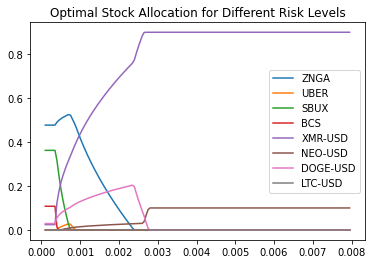

In [ ]:
# Creating dataframe for proportions of the portfolio for each risk limit

param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')

#Giving the tickers as the column names
param_analysis.columns = ['ZNGA', 'UBER', 'SBUX', 'BCS', 'XMR-USD', 'NEO-USD', 'DOGE-USD', 'LTC-USD']
param_analysis
# Specifying the size of the plot
plt.figure(figsize=(50, 50), dpi=800)
# Plotting the graph
param_analysis.plot()
# Giving the title for the plot
plt.title('Optimal Stock Allocation for Different Risk Levels')
# Display the plot
plt.xlabel('')
plt.xlabel('')
plt.show()

The lefthand side that there is low risk and high diversity whereas on the on the righthand side there is high risk and low diversity. At each risk level, this is the optimal allocation of stocks. 

After adding the constraints , from the graph we can see that we can have optimal solution at 0.0025 risk. Two stocks XMR-USD and NEO-USD have hit a plateau. For the same risk level of 0.0025, we tend to see more returns for the stocks.

In [ ]:
# Creating the subsets
# Extracting dictionary keys into list
risk = list(returns.keys())
print(risk)
# Extracting dictionary values into list
reward = list(returns.values()) 
print(reward)

[0.0001, 0.00025, 0.00035000000000000005, 0.0004, 0.00045000000000000004, 0.0005000000000000001, 0.0005500000000000001, 0.0006000000000000002, 0.0006500000000000002, 0.0007000000000000001, 0.0007500000000000001, 0.0008000000000000001, 0.0008500000000000002, 0.0009000000000000002, 0.0009500000000000002, 0.0010000000000000002, 0.0010500000000000002, 0.0011000000000000003, 0.0011500000000000002, 0.0012000000000000003, 0.0012500000000000002, 0.0013000000000000002, 0.0013500000000000003, 0.0014000000000000002, 0.0014500000000000003, 0.0015000000000000002, 0.0015500000000000004, 0.0016000000000000003, 0.0016500000000000004, 0.0017000000000000003, 0.0017500000000000003, 0.0018000000000000004, 0.0018500000000000003, 0.0019000000000000004, 0.0019500000000000003, 0.0020000000000000005, 0.00205, 0.0021000000000000003, 0.00215, 0.0022, 0.0022500000000000003, 0.0023000000000000004, 0.00235, 0.0024000000000000002, 0.0024500000000000004, 0.0025, 0.00255, 0.0026000000000000003, 0.0026500000000000004, 

Plot it!

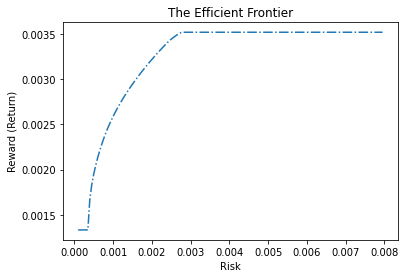

In [ ]:
#showing plots
# Importing pylab
from pylab import *
plot(risk, reward, '-.') # Plotting risk vs reward with indicator
title('The Efficient Frontier') # Giving title for plot
# Labelling the axis
xlabel('Risk')
ylabel('Reward (Return)')
plt.show()

## Integer programming for best portfolio of 4 stocks

We were curious to know how the stocks will return, if we put >10% for atleast two stocks. Here, we are assuming if we set the constraints for the 4 stocks (best portfolio) and running the integer programming again.

In [ ]:
df_return__new=df_return_data.loc[:,('ZNGA','XMR-USD','NEO-USD','DOGE-USD')]
df_new_mean=df_return__new.mean()
df_new_mean

ZNGA        0.001473
XMR-USD     0.003538
NEO-USD     0.003345
DOGE-USD    0.002883
dtype: float64

In [ ]:
#import pyomo concrete model
from pyomo.environ import *


k = ConcreteModel() # create a new model

# declare variable for the 4 chosen stocks
k.ZNGA = Var(within=NonNegativeReals, bounds=(0,1))
k.XMR_USD = Var(within=NonNegativeReals, bounds=(0,1))
k.NEO_USD = Var(within=NonNegativeReals, bounds=(0,1))
k.DOGE_USD = Var(within=NonNegativeReals, bounds=(0,1))

# declare binary variables for stock combinations
k.p12=Var(domain= Binary)
k.p13=Var(domain= Binary)
k.p14=Var(domain= Binary)
k.p23=Var(domain= Binary)
k.p24=Var(domain= Binary)
k.p34=Var(domain= Binary)


# Declaring objective function
k.objective = Objective(expr =
                        k.ZNGA*df_new_mean[0] +
                        k.XMR_USD*df_new_mean[1] +
                        k.NEO_USD*df_new_mean[2] +
                        k.DOGE_USD*df_new_mean[3],
                        sense = maximize)

# 1. Sum of all porportions = 1
k.sum_proportions = Constraint(expr = k.ZNGA + k.XMR_USD + k.NEO_USD + k.DOGE_USD == 1)


# 2. Maximum risk
k.risk_floor = Constraint(expr =  k.objective >= 0.008)

# Stock selection constraint

k.portfolio_select=Constraint(expr= k.p12+k.p13+k.p14+k.p23+k.p24+k.p34 == 1)

# Budget constraint

k.stock1=Constraint(expr= k.ZNGA*k.p12+k.ZNGA*k.p13+k.ZNGA*k.p14+k.XMR_USD*k.p23+k.XMR_USD*k.p24+k.NEO_USD*k.p34 >= 0.1) # 10% budget

k.stock2=Constraint(expr= k.XMR_USD*k.p12+k.NEO_USD*k.p13+k.DOGE_USD*k.p14+k.NEO_USD*k.p23+k.DOGE_USD*k.p24+k.DOGE_USD*k.p34 >= 0.1) # 10% budget


In [ ]:
#Risk Ceiling
# Calculations table is been created for calculate the risk

# Defining the funtion for calculating the risk for the assets

def calc_risk(k):
  proportions = k.ZNGA, k.XMR_USD, k.NEO_USD, k.DOGE_USD
 
  tickers = ["ZNGA","UBER","SBUX","BCS","XMR-USD","NEO-USD","DOGE-USD","LTC-USD"]
  risk_exp = 0
  for i in range(len(proportions)):
    for j in range(len(proportions)):
      risk_exp += proportions[i]*df_return_data_cov.at[tickers[i],tickers[j]]*proportions[j]
  return risk_exp

# For computing the risk we are using this variable
expr_risk = calc_risk(k)

# Maximum risk has been defined to be less than 0.008
max_risk = 0.008
# Risk conditions has been given to create a series
risk_limits = np.arange(0.0001, max_risk, 0.00005)
risk_limits.shape

(158,)

In [ ]:
# Run Model
# updating risk contraint for each limit and then solving the problem
from pyomo.opt import SolverStatus, TerminationCondition

# By creating a dictionary we are updating risk contraint for each limit for parameter analysis

# Here in dictionary we will be using risk as key and value as stock allocation

param_analysis = {}

#Creating dictionary for returns

# Here in dictionary we will be using risk as key and value as return

returns = {}
for r in risk_limits:
  k.del_component(k.risk_floor)
  k.risk_floor = Constraint(expr = expr_risk <= r)
  ## running solver for optimization with ipopt name
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(k)
  # Ignoring this run if solution is not feasible
  if result.solver.termination_condition == TerminationCondition.infeasible:
    continue

  result = result.write()
  # allocation proportions are been stored in dictionary for each index
  param_analysis[r] = [k.ZNGA(),  k.XMR_USD(), k.NEO_USD(), k.DOGE_USD()]
  # return are been stored in dictionary for each index
  returns[r] =  k.ZNGA()*df_return_data_mean[0] + m.XMR_USD()*df_return_data_mean[4] + m.NEO_USD()*df_return_data_mean[5] + m.DOGE_USD()*df_return_data_mean[6]

    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
    model.name="unknown";
      - termination condition: maxIterations
      - message from solver: Ipopt 3.12.13\x3a Maximum Number of Iterations
        Exceeded.
# ==========================================================
# = Solver

<Figure size 40000x40000 with 0 Axes>

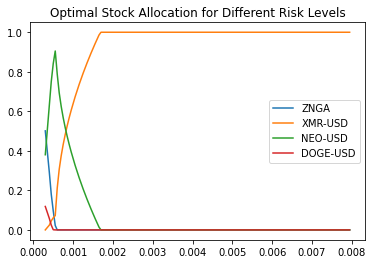

In [ ]:
# Parameter analysis

# Creating dataframe for proportions of the portfolio for each risk limit

param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')

#Giving the tickers as the column names
param_analysis.columns = ['ZNGA', 'XMR-USD', 'NEO-USD', 'DOGE-USD']
param_analysis
# Specifying the size of the plot
plt.figure(figsize=(50, 50), dpi=800)
# Plotting the graph
param_analysis.plot()
# Giving the title for the plot
plt.title('Optimal Stock Allocation for Different Risk Levels')
# Display the plot
plt.show()

We noticed that one stock XMR-USD has hit the plateau and the risk level has been reduced significantly lower than 0.0025.

In [ ]:
# Creating the subsets
# Extracting dictionary keys into list
risk = list(returns.keys())
print(risk)
# Extracting dictionary values into list
reward = list(returns.values()) 
print(reward)

[0.00030000000000000003, 0.0004, 0.00045000000000000004, 0.0005000000000000001, 0.0005500000000000001, 0.0006000000000000002, 0.0006500000000000002, 0.0007000000000000001, 0.0007500000000000001, 0.0008000000000000001, 0.0008500000000000002, 0.0009000000000000002, 0.0009500000000000002, 0.0010000000000000002, 0.0010500000000000002, 0.0011000000000000003, 0.0011500000000000002, 0.0012000000000000003, 0.0012500000000000002, 0.0013000000000000002, 0.0013500000000000003, 0.0014000000000000002, 0.0014500000000000003, 0.0015000000000000002, 0.0015500000000000004, 0.0016000000000000003, 0.0016500000000000004, 0.0017000000000000003, 0.0017500000000000003, 0.0018000000000000004, 0.0018500000000000003, 0.0019000000000000004, 0.0019500000000000003, 0.0020000000000000005, 0.00205, 0.0021000000000000003, 0.00215, 0.0022, 0.0022500000000000003, 0.0023000000000000004, 0.00235, 0.0024000000000000002, 0.0024500000000000004, 0.0025, 0.00255, 0.0026000000000000003, 0.0026500000000000004, 0.0027, 0.0027500

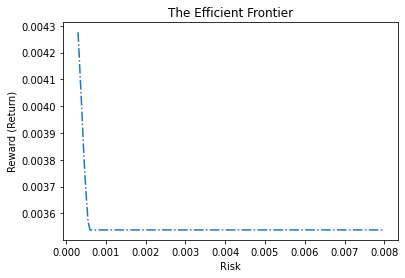

In [ ]:
#showing plots
# Importing pylab
from pylab import *
plot(risk, reward, '-.') # Plotting risk vs reward with indicator
title('The Efficient Frontier') # Giving title for plot
# Labelling the axis
xlabel('Risk')
ylabel('Reward (Return)')
plt.show()

# Conclusions

* 1. For the Cryptocurrencies stocks there appeared to be more missing values, as those were listed in 2017 only and some initial data was missing which we had to remove. 

* 2. We observed a common trend for all 8 stocks in the yahoo finanace, which have fell to the bottom with lowest closing rates around April 2020 - May 2020. We assume this is because of the Covid-19 pandemic. 


* 3. When we formed our portfolio of stocks, our goals are to maximize the mean return and to minimize the risk. So, from the 'Optimal Stock Allocation for Different Risk Levels' graph we can see that we can have optimal solution at 0.0025 risk level as we can see and we can extract 4 assets 'ZNGA','NEO-USD','XMR-USD','DOGE-USD'

* 4. From our portfolio distribution, we can see that for a risk level close to 0.0025, at which our chosen four stocks have a significant return compared to the rest. Hence we have chose the risk level as 0.0025 to yield a return for the simulation.

* 5. With a risk level of 0.0025 from the efficient frontier graph, we have simluted our stocks for 1000 simulations and found out that out loss count is around 474 and loss probablility is around 47.4%. This keeps changing as we run the model every time but stays below 50%.

* 6. While comparing the returns of our selected portfolio of stocks 'ZNGA','NEO-USD','XMR-USD','DOGE-USD' with both the S&P 500 and Dow Jones indices, we see that we can get more return at 53 % profit compared to DJI and SNP which made 21 % and 7 % only. Therefore we concluded that the portfolio we chose is much better and profitable than DJI and SNP.

* 7. We changed our optimization model to force allocations where at least two stocks with at least 10% of the budget using nteger Programming model. From the results we could see that we have got optimal solution at around 0.0025 risk level. Two stocks XMR-USD and NEO-USD have hit a plateau. Overall, for the same risk level of around 0.0025, we tend to see more returns/rewards for the stocks.

* 8. When we tried similar integer programming programming for the best 4 stocks by forcing at least two stock to have at least 10%, we could see that risk level has come down as expected. 
 


